# Visualizing High-Dimensional Data with Python

Instructor: [Jeroen Janssens](https://jeroenjanssens.com)

## PCA Solution

### Exercise details

In this exercise, you'll apply PCA to the Luv dataset, which contains 657 colors in Luv color space. The code below is missing some pieces, denoted by three dots (`...`). Your job is to fill in the correct values.

In [1]:
# Load the Luv dataset from the plotnine package
from plotnine.data import luv_colours
luv_colours

,L,u,v,col
0,9341.570222,-3.370649e-12,0.000000,white
1,9100.962053,-4.749170e+02,-635.350249,aliceblue
2,8809.518191,1.008865e+03,1668.004214,antiquewhite
3,8935.225481,1.065698e+03,1674.594790,antiquewhite1
4,8452.498771,1.014911e+03,1609.592311,antiquewhite2
...,...,...,...,...
652,9111.624287,7.407650e+02,9983.069717,yellow1
653,8621.588855,7.009257e+02,9446.166776,yellow2
654,7649.614459,6.219052e+02,8381.231716,yellow3
655,5602.235886,4.554556e+02,6138.039680,yellow4


In [2]:
# Remove all columns that shouldn't be used as features
luv = luv_colours.drop("col", axis=1)

In [3]:
# Import the PCA class from scikit-learn
from sklearn.decomposition import PCA

In [4]:
# Apply PCA
pca = PCA(n_components=2)
luv_mapped = pca.fit_transform(luv)

luv_mapped

array([[-1181.18356257,  1213.80934463],
       [-1929.62633511,   904.32914611],
       [  574.65523403,  1926.54702182],
       ...,
       [ 3938.21875897,  7395.98022282],
       [ 2545.55425294,  5250.23557892],
       [ 1024.04402014,  8842.36343105]])

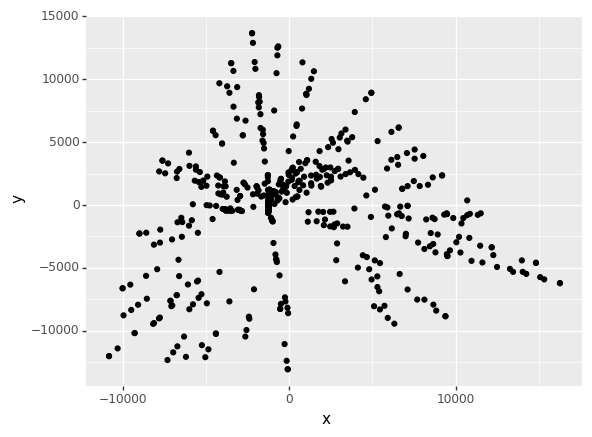

<ggplot: (8774675508077)>

In [5]:
# Turn result into a DataFrame and plot result.
# Remember: you're free to use any plotting library you like.
from helpers import *
df = make_df(luv_mapped)

# Plot result
plot(df)

### Bonus challenge 1: Use the actual colors in the scatter plot

#### Install the package colormath

In [6]:
! pip install colormath

#### Convert Luv colors to RGB

In [7]:
# This piece of code converts Luv to RGB in hex format
from colormath.color_objects import LuvColor, sRGBColor
from colormath.color_conversions import convert_color

def luv2hex(row):
    rgb = convert_color(LuvColor(*(row/100)), sRGBColor)
    rgb.rgb_r = rgb.clamped_rgb_r
    rgb.rgb_g = rgb.clamped_rgb_g
    rgb.rgb_b = rgb.clamped_rgb_b
    return rgb.get_rgb_hex()

# Get the hex color for all rows
df["target"] = luv_colours.drop("col", axis=1).apply(luv2hex, axis=1)

#### Plot the result

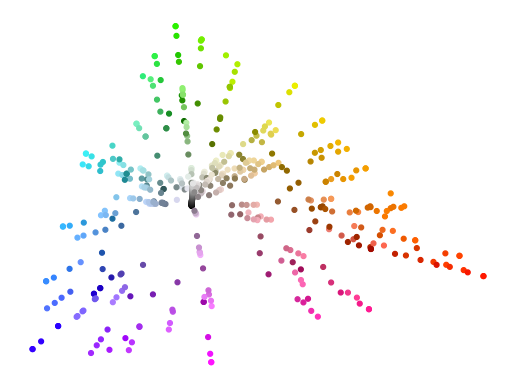

<ggplot: (8774664641549)>

In [8]:
# We cannot use the helper function plot here because we need assign a unique
# color to each point.
ggplot(df, aes(x="x", y="y", color="target")) +\
geom_point() +\
scale_color_identity() +\
theme_void()

### Bonus challenge 2: Implement a biplot

Draw the axes of the original features as lines, with a label, similar to:

![](https://blog.bioturing.com/wp-content/uploads/2018/11/PCA-bi-plot.png)

Hint: Think of the starts and ends of each line as data points and use the fitted PCA object to transform them to the lower-dimensional space.

In [9]:
import numpy as np
import pandas as pd

In [20]:
O = pca.transform(np.zeros((luv.shape[1], luv.shape[1])))
E = pca.transform(np.diag(luv.max()*1.1))

In [21]:
df_axes = pd.DataFrame(np.concatenate([O, E], axis=1), columns=["xo", "yo", "x", "y"])
df_axes["label"] = luv.columns.values

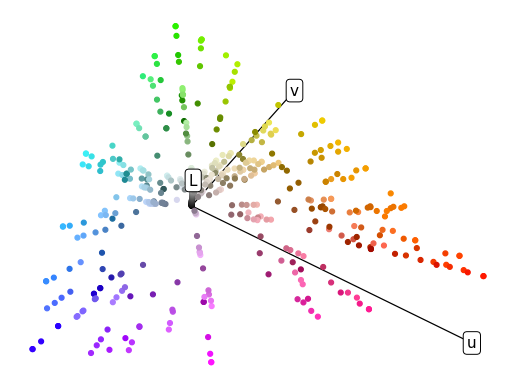

<ggplot: (8774664522585)>

In [22]:
# This code can be used to plot both the data points and the original axes as lines with labels.
# Ggplot expects a DataFrame called df_axes containing three rows, one for each original feature.
ggplot(df, aes(x="x", y="y", color="target")) +\
geom_segment(aes(xend="xo", yend="yo"), data=df_axes, color="black") +\
geom_point() +\
geom_label(aes(label="label"), data=df_axes, color="black") +\
scale_color_identity() +\
theme_void()